**Importing Libraries:**

In [40]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from IPython.display import clear_output

**Listing files under input directory:**

In [41]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


**Reading .csv files :**

In [42]:
train_data = pd.read_csv(Path("/kaggle/input/digit-recognizer/train.csv"))
test_data = pd.read_csv(Path("/kaggle/input/digit-recognizer/test.csv"))
sample_submission = pd.read_csv(Path("/kaggle/input/digit-recognizer/sample_submission.csv"))

**Taking a quick look at the data structure:**

In [43]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [46]:
#plotting the digits
def plot_digit(X,v=0,h=0):
    image = shift(X.reshape(28,28),(v,h))
    plt.imshow(image,cmap="binary")
    plt.axis("off")

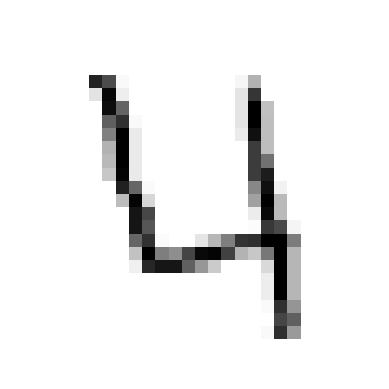

In [47]:
td = np.array(train_data)
plot_digit(td[3,1:])

**Preparing the data :**

In [49]:
X_train_data = np.array(train_data.iloc[:,1:])
y_train_data = np.array(train_data.iloc[:,0])

**Training and fine-tuning a Classifier:**

In [50]:
knn_pipline = Pipeline([("classifier",KNeighborsClassifier(n_neighbors=5))])

In [51]:
param_grid = [{'classifier__n_neighbors':[2,3,4,5,6],
               'classifier__weights':['uniform','distance']}]

In [52]:
grid_search = GridSearchCV(knn_pipline,param_grid,cv=3,scoring = "accuracy")

In [53]:
grid_search.fit(X_train_data,y_train_data)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier__n_neighbors': [2, 3, 4, 5, 6],
                          'classifier__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [54]:
grid_search.best_params_

{'classifier__n_neighbors': 4, 'classifier__weights': 'distance'}

In [59]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score",ascending=False,inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__n_neighbors,param_classifier__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,0.130928,0.001085,15.329547,0.338035,4,distance,"{'classifier__n_neighbors': 4, 'classifier__we...",0.967500,0.966929,0.968857,0.967762,0.000809,1
9,0.130350,0.002598,15.193715,0.412514,6,distance,"{'classifier__n_neighbors': 6, 'classifier__we...",0.966929,0.965857,0.967214,0.966667,0.000584,2
3,0.131920,0.003254,14.847070,0.115802,3,distance,"{'classifier__n_neighbors': 3, 'classifier__we...",0.966571,0.965500,0.967571,0.966548,0.000846,3
7,0.128703,0.001047,15.356115,0.645866,5,distance,"{'classifier__n_neighbors': 5, 'classifier__we...",0.965429,0.964429,0.966714,0.965524,0.000936,4
2,0.130561,0.001181,15.656719,0.283434,3,uniform,"{'classifier__n_neighbors': 3, 'classifier__we...",0.966357,0.964286,0.965857,0.965500,0.000883,5
1,0.129481,0.000253,13.734988,0.138627,2,distance,"{'classifier__n_neighbors': 2, 'classifier__we...",0.964286,0.963214,0.965714,0.964405,0.001024,6
6,0.134529,0.004629,15.675416,0.246227,5,uniform,"{'classifier__n_neighbors': 5, 'classifier__we...",0.964571,0.963286,0.964786,0.964214,0.000662,7
4,0.128874,0.000411,15.938567,0.262361,4,uniform,"{'classifier__n_neighbors': 4, 'classifier__we...",0.964000,0.962286,0.963000,0.963095,0.000703,8
8,0.131732,0.003313,15.728818,0.193796,6,uniform,"{'classifier__n_neighbors': 6, 'classifier__we...",0.962500,0.962429,0.962429,0.962452,0.000034,9
0,0.129877,0.000455,14.616021,0.434375,2,uniform,"{'classifier__n_neighbors': 2, 'classifier__we...",0.958143,0.957143,0.956643,0.957310,0.000624,10


**Performance Measures:** 

In [55]:
cross_val_score(grid_search,X_train_data,y_train_data,cv=3,scoring = "accuracy" )

array([0.9675    , 0.96692857, 0.96885714])

In [56]:
y_train_predict = cross_val_predict(grid_search,X_train_data,y_train_data,cv=3 )

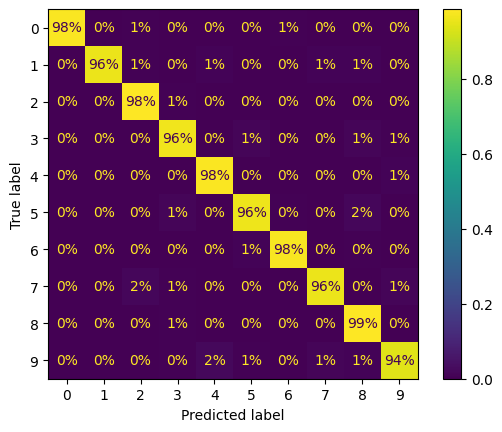

In [57]:
ConfusionMatrixDisplay.from_predictions(y_train_predict,np.array(train_data.iloc[:,0]),normalize="true",values_format=".0%")
plt.show()

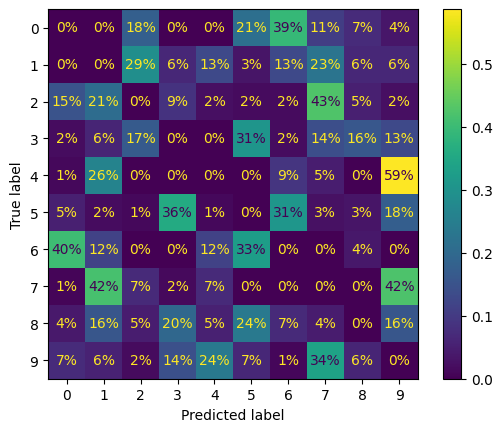

In [58]:
sample_weight = (y_train_predict != np.array(train_data.iloc[:,0]))
ConfusionMatrixDisplay.from_predictions(np.array(train_data.iloc[:,0]),y_train_predict,sample_weight=sample_weight,normalize="true",values_format=".0%")
plt.show()

**Evaluation :**

In [60]:
final_evaluation = grid_search.predict(test_data)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [62]:
d = {'ImageId':np.arange(28000) + 1,'Label':final_evaluation}
df = pd.DataFrame(data=d)
df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [63]:
df.to_csv('out.csv',index=False)